In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv("data/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


现在假定这人们对这三种花有价格偏好：

其中：Iris-setosa的价格为$7.00，Iris-versicolor的价格为$5.00，Iris-virginica的价格为$3.00。

而总价格 = (SepalLength + PetalWidth)+ 基础价格

现在，我们尝试通过SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm这五个特征来预测Iris的价格

In [20]:
# 新增price列
df["price"] = np.zeros(len(df))
# 遍历每一行
for i in range(len(df)):
    # 如果是setosa，price=5
    if df.iloc[i]["Species"] == "Iris-setosa":
        df.loc[i,"price"] = (df.iloc[i]["SepalLengthCm"]+df.iloc[i]["PetalWidthCm"])+7
    # 如果是versicolor，price=2
    elif df.iloc[i]["Species"] == "Iris-versicolor":
        df.loc[i,"price"] = (df.iloc[i]["SepalLengthCm"]+df.iloc[i]["PetalWidthCm"])+5
    # 如果是virginica，price=3
    elif df.iloc[i]["Species"] == "Iris-virginica":
        df.loc[i,"price"] = (df.iloc[i]["SepalLengthCm"]+df.iloc[i]["PetalWidthCm"])+3
    else:
        print("error")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,price
0,1,5.1,3.5,1.4,0.2,Iris-setosa,12.3
1,2,4.9,3.0,1.4,0.2,Iris-setosa,12.1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,11.9
3,4,4.6,3.1,1.5,0.2,Iris-setosa,11.8
4,5,5.0,3.6,1.4,0.2,Iris-setosa,12.2


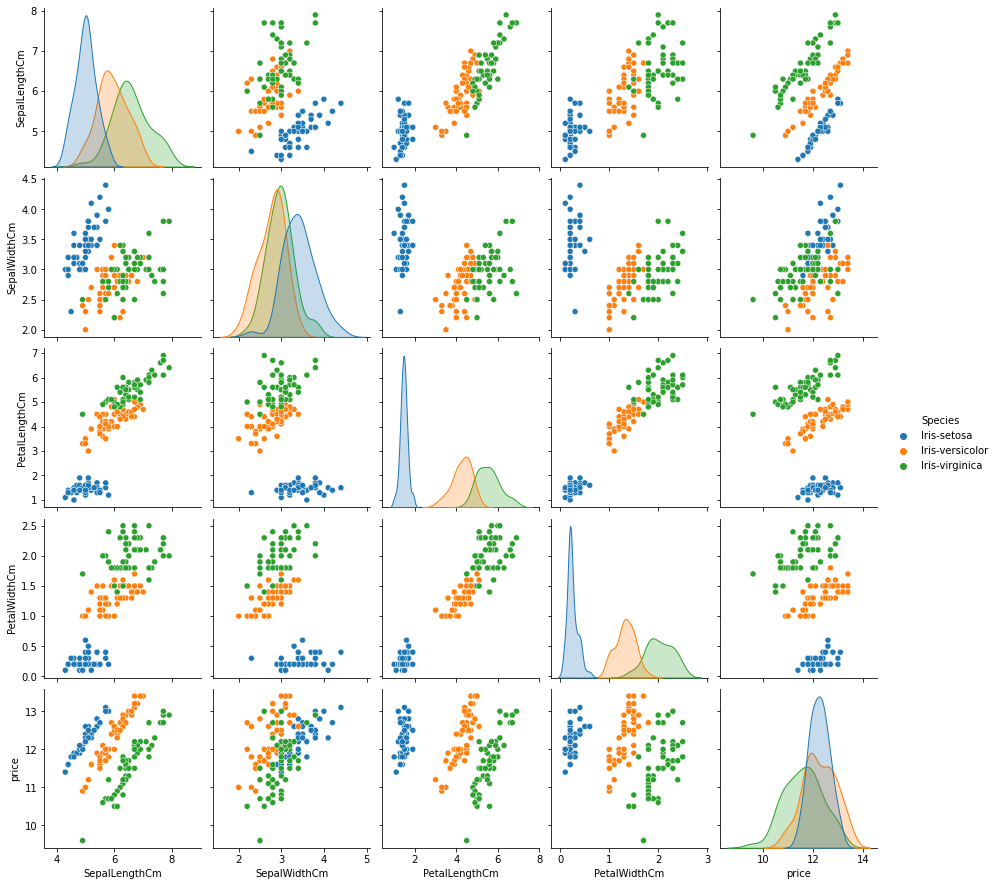

In [21]:
# visualize the data

sns.pairplot(df.drop(["Id"],axis=1), hue="Species")

In [22]:
# 分训练集和测试集
train_df = df.sample(frac=0.8, random_state=0)
test_df = df.drop(train_df.index)

In [23]:
setosa = train_df[train_df["Species"] == "Iris-setosa"]
print("setosa",setosa.SepalLengthCm.mean(),setosa.SepalWidthCm.mean(),setosa.PetalLengthCm.mean(),setosa.PetalWidthCm.mean())
versicolor = train_df[train_df["Species"] == "Iris-versicolor"]
print("versicolor-mean",versicolor.SepalLengthCm.mean(),versicolor.SepalWidthCm.mean(),versicolor.PetalLengthCm.mean(),versicolor.PetalWidthCm.mean())
print("versicolor-max", versicolor.SepalLengthCm.max(),versicolor.SepalWidthCm.max(),versicolor.PetalLengthCm.max(),versicolor.PetalWidthCm.max())
print("versicolor-min", versicolor.SepalLengthCm.min(),versicolor.SepalWidthCm.min(),versicolor.PetalLengthCm.min(),versicolor.PetalWidthCm.min())
virginica = train_df[train_df["Species"] == "Iris-virginica"]
print("virginica-mean",virginica.SepalLengthCm.mean(),virginica.SepalWidthCm.mean(),virginica.PetalLengthCm.mean(),virginica.PetalWidthCm.mean())
print("virginica-max", virginica.SepalLengthCm.max(),virginica.SepalWidthCm.max(),virginica.PetalLengthCm.max(),virginica.PetalWidthCm.max())
print("virginica-min", virginica.SepalLengthCm.min(),virginica.SepalWidthCm.min(),virginica.PetalLengthCm.min(),virginica.PetalWidthCm.min())


setosa 4.9875 3.4174999999999995 1.4675 0.25
versicolor-mean 5.920512820512819 2.77948717948718 4.253846153846155 1.3307692307692305
versicolor-max 7.0 3.4 5.1 1.6
versicolor-min 4.9 2.0 3.0 1.0
virginica-mean 6.546341463414634 2.951219512195122 5.504878048780488 2.0024390243902435
virginica-max 7.9 3.8 6.9 2.5
virginica-min 4.9 2.2 4.5 1.4


In [24]:
setosa.PetalLengthCm.max()

1.9

In [25]:
# Approach 1:
# 先验知识: 花的价格和(花的长度+花的宽度+花的种类)有关系
# 使用基于规则的专家系统，将数据分为三类，再用先验知识进行线性拟合

# 该基于规则的专家系统逻辑如下：
# 假设这些规则是植物学家的经验
def which_class(sl,sw,pl,pw):
    if pl <= 1.9:
        return "Iris-setosa"
    if sl > 6.8 or sw > 3.2 or pl > 4.9 or pw > 1.6:
        return "Iris-virginica"
    if sw < 2.2 or pl < 3.0 or pw < 1.4:
        return "Iris-versicolor"
    else:
        setosa_mean = np.array([4.98,4.41,1.56,0.25])
        versicolor_mean = np.array([5.92, 2.88, 4.25, 0.33])
        virginica_mean = np.array([5.54, 2.95, 5.60, 1.00])
        # find the min distance
        setosa_dist = np.linalg.norm(setosa_mean - np.array([sl,sw,pl,pw]))
        versicolor_dist = np.linalg.norm(versicolor_mean - np.array([sl,sw,pl,pw]))
        virginica_dist = np.linalg.norm(virginica_mean - np.array([sl,sw,pl,pw]))
        if setosa_dist < versicolor_dist and setosa_dist < virginica_dist:
            return "Iris-setosa"
        elif versicolor_dist < setosa_dist and versicolor_dist < virginica_dist:
            return "Iris-versicolor"
        elif virginica_dist < setosa_dist and virginica_dist < versicolor_dist:
            return "Iris-virginica"
        else:
            return "error"
pred1 = [which_class(row[1],row[2],row[3],row[4]) for row in test_df.values]
test_df["pred_cls_1"] = pred1
pred1 = [which_class(row[1],row[2],row[3],row[4]) for row in train_df.values]
train_df["pred_cls_1"] = pred1
# 准确率
print(f"基于规则的方法在测试集上的准确率为{(test_df.pred_cls_1==test_df.Species).sum()/len(test_df):.3f}, 在训练集上的准确率为{(train_df.pred_cls_1==train_df.Species).sum()/len(train_df):.3f}")
def calc_price(sl,sw,pl,pw,c):
    if c == "Iris-setosa":
        setosa = train_df[train_df["Species"] == "Iris-setosa"]
        setosa_b = (setosa.price-setosa.SepalLengthCm-setosa.PetalWidthCm).mean()
        return sl+pw+setosa_b
    if c == "Iris-versicolor":
        versicolor = train_df[train_df["Species"] == "Iris-versicolor"]
        versicolor_b = (versicolor.price-versicolor.SepalLengthCm-versicolor.PetalWidthCm).mean()
        return sl+pw+versicolor_b
    if c == "Iris-virginica":
        virginica = train_df[train_df["Species"] == "Iris-virginica"]
        virginica_b = (virginica.price-virginica.SepalLengthCm-virginica.PetalWidthCm).mean()
        return sl+pw+virginica_b
    else:
        return 0
pred2 = [calc_price(row[0],row[1],row[2],row[3],row[4]) for row in test_df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm","pred_cls_1"]].values]
test_df["pred_price_1"] = pred2
pred2 = [calc_price(row[0],row[1],row[2],row[3],row[4]) for row in train_df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm","pred_cls_1"]].values]
train_df["pred_price_1"] = pred2
# MSE
train_mse = ((train_df.price-train_df.pred_price_1)**2).mean()
test_mse = ((test_df.price-test_df.pred_price_1)**2).mean()
print(f"基于规则的方法在测试集上的MSE为{test_mse:.3f}, 在训练集上的MSE为{train_mse:.3f}")


基于规则的方法在测试集上的准确率为0.900, 在训练集上的准确率为0.933
基于规则的方法在测试集上的MSE为0.400, 在训练集上的MSE为0.267


loss: 0.33261242508888245


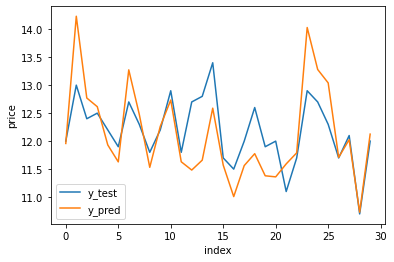

In [26]:
# Approach 2:
# 无先验知识，最流行的端到端模型，直接训回归模型
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
# 准备数据集
train_x = torch.tensor(train_df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]].values).float()
train_y = torch.tensor(train_df["price"].values).float()
test_x = torch.tensor(test_df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]].values).float()
test_y = torch.tensor(test_df["price"].values).float()
# 定义数据集
class IrisDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    def __len__(self):
        return len(self.x)
# 定义Dataloader
train_loader = DataLoader(dataset=IrisDataset(train_x, train_y), batch_size=8, shuffle=True)
test_loader = DataLoader(dataset=IrisDataset(test_x, test_y), batch_size=8, shuffle=True)

# 定义模型
class MultiLayerRegression(nn.Module):
    def __init__(self,input_size:int = 4, output_size:int =1, hidden_size:int=10, hidden_layers:int=1):
        super().__init__()
        self.hidden_layers = hidden_layers
        self.hidden_size = hidden_size
        self.input_size = input_size
        self.output_size = output_size
        self.layers = nn.ModuleList()
        for i in range(self.hidden_layers):
            if i == 0:
                self.layers.append(nn.Linear(self.input_size, self.hidden_size))
            else:
                self.layers.append(nn.Linear(self.hidden_size, self.hidden_size))
        self.output = nn.Linear(self.hidden_size, self.output_size)
    def forward(self, x):
        for layer in self.layers:
            x = F.relu(layer(x))
        return self.output(x)
# 训练模型
model = MultiLayerRegression(input_size=4, output_size=1, hidden_size=10, hidden_layers=3)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-4)
losses = []
for epoch in range(1000):
    for i, (x, y) in enumerate(train_loader):
        y_pred = model(x)
        loss = criterion(y_pred.squeeze(), y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if epoch % 5 == 0:
        y_pred = model(test_x)
        loss = criterion(y_pred.squeeze(), test_y)
        losses.append(loss.item())
# 预测
y_pred = model(train_x)
train_df["pred_price_2"] = y_pred.detach().numpy()
y_pred = model(test_x)
loss = criterion(y_pred.squeeze(), test_y)
print("loss: {}".format(loss.item()))
test_df["pred_price_2"] = y_pred.detach().numpy()

# 将y_pred和test_y画出来
plt.plot(test_y.numpy(), label="y_test")
plt.plot(y_pred.detach().numpy(), label="y_pred")
plt.xlabel("index")
plt.ylabel("price")
plt.legend()

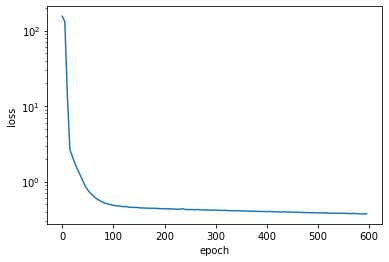

In [27]:
# 做出Approach 2的loss图
plt.plot(np.arange(0,600,5),losses[:120])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.yscale("log")

In [28]:
train_mse = ((train_df.price-train_df.pred_price_2)**2).mean()
test_mse = ((test_df.price-test_df.pred_price_2)**2).mean()
print(f"纯神经网络的方法在测试集上的MSE为{test_mse:.3f}, 在训练集上的MSE为{train_mse:.3f}")

纯神经网络的方法在测试集上的MSE为0.333, 在训练集上的MSE为0.375


In [29]:
# Approach 3: 
# 有先验知识，分类这一步用神经网络，但是价格预测一步用基于规则的专家系统
# 先验知识: 花的价格和(花的长度+花的宽度+花的种类)有关系

# 准备数据

train_x = torch.tensor(train_df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]].values).float()
species_map = {species:i for i, species in enumerate(train_df.Species.unique())}
train_y = torch.tensor([species_map[species] for species in train_df.Species]).long()
test_x = torch.tensor(test_df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]].values).float()
test_y = torch.tensor([species_map[species] for species in test_df.Species]).long()

class IrisDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    def __len__(self):
        return len(self.x)

train_loader = DataLoader(dataset=IrisDataset(train_x, train_y), batch_size=8, shuffle=True)
test_loader = DataLoader(dataset=IrisDataset(test_x, test_y), batch_size=8, shuffle=True)

class MultiLayerClassification(nn.Module):
    def __init__(self,input_size:int = 4, output_size:int =3, hidden_size:int=10, hidden_layers:int=1):
        super().__init__()
        self.hidden_layers = hidden_layers
        self.hidden_size = hidden_size
        self.input_size = input_size
        self.output_size = output_size
        self.layers = nn.ModuleList()
        for i in range(self.hidden_layers):
            if i == 0:
                self.layers.append(nn.Linear(self.input_size, self.hidden_size))
            else:
                self.layers.append(nn.Linear(self.hidden_size, self.hidden_size))
        self.output = nn.Linear(self.hidden_size, self.output_size)
    def forward(self, x):
        for layer in self.layers:
            x = F.relu(layer(x))
        return self.output(x)

model = MultiLayerClassification(input_size=4, output_size=3, hidden_size=10, hidden_layers=1)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3)
losses = []
for epoch in range(600):
    for i, (x, y) in enumerate(train_loader):
        y_pred = model(x)
        loss = criterion(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if epoch % 5 == 0:
        y_pred = model(test_x)
        loss = criterion(y_pred, test_y)
        losses.append(loss.item())
# 预测
y_pred = model(train_x)
map_back = {i:species for species, i in species_map.items()}
train_df["pred_cls_3"] = [map_back[i.item()] for i in y_pred.argmax(1)]
y_pred = model(test_x)
loss = criterion(y_pred, test_y)
print("loss: {}".format(loss.item()))
test_df["pred_cls_3"] = [map_back[i.item()] for i in y_pred.argmax(1)]
# 预测正确率
train_correct = (train_df.pred_cls_3 == train_df.Species).mean()
test_correct = (test_df.pred_cls_3 == test_df.Species).mean()
print(f"结合规则和神经网络的方法在测试集上的正确率为{test_correct:.3f}, 在训练集上的正确率为{train_correct:.3f}")


loss: 0.24082805216312408
结合规则和神经网络的方法在测试集上的正确率为0.933, 在训练集上的正确率为0.983


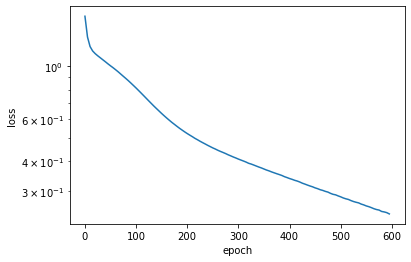

In [30]:
# 做出Approach 2的loss图
plt.plot(np.arange(0,600,5),losses)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.yscale("log")

In [31]:
pred2 = [calc_price(row[0],row[1],row[2],row[3],row[4]) for row in test_df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm","pred_cls_3"]].values]
test_df["pred_price_3"] = pred2
pred2 = [calc_price(row[0],row[1],row[2],row[3],row[4]) for row in train_df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm","pred_cls_3"]].values]
train_df["pred_price_3"] = pred2
# MSE
train_mse = ((train_df.price-train_df.pred_price_3)**2).mean()
test_mse = ((test_df.price-test_df.pred_price_3)**2).mean()
print(f"结合规则和神经网络的方法在测试集上的MSE为{test_mse:.3f}, 在训练集上的MSE为{train_mse:.3f}")

结合规则和神经网络的方法在测试集上的MSE为0.267, 在训练集上的MSE为0.067


Text(0.5, 1.0, 'Execution Time of Rule-based Expert, Pure Neural Network and Hybrid Approach')

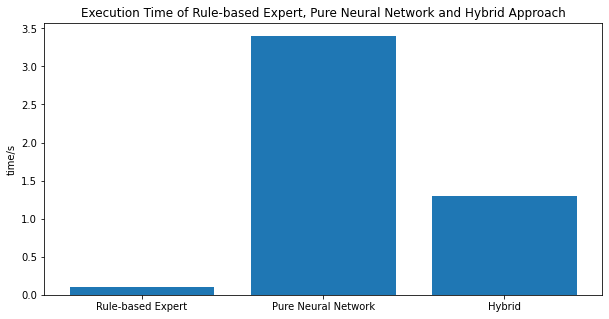

In [32]:
# 画柱状图
# Rule-based:0.1 Neural Network:3.4 Hybrid: 1.3
plt.figure(figsize=(10,5))
plt.bar(["Rule-based Expert","Pure Neural Network","Hybrid"],[0.1,3.4,1.3])
plt.ylabel("time/s")
# set table name
plt.title("Execution Time of Rule-based Expert, Pure Neural Network and Hybrid Approach")

<AxesSubplot:xlabel='Approach'>

<Figure size 720x360 with 0 Axes>

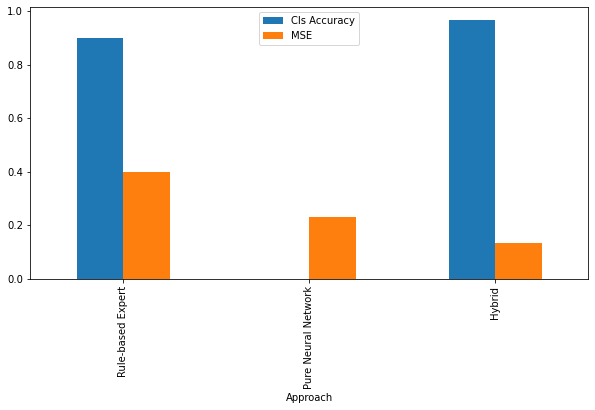

In [33]:
# Classification and MSE in test set
# Cls: Rule-based:0.9 Neural Network: NaN Hybrid: 0.967
# MSE: Rule-based: 0.40 Neural Network: 0.23 Hybrid: 0.133

# Draw Cls and MSE in same bar
plt.figure(figsize=(10,5))
data = [["Rule-based Expert",0.9,0.4],
        ["Pure Neural Network",np.nan,0.23],
        ["Hybrid",0.967,0.133]]
df = pd.DataFrame(data,columns=["Approach","Cls Accuracy","MSE"])
df.plot(x="Approach",y=["Cls Accuracy","MSE"],kind="bar", figsize=(10,5))
